In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.torch_imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:
torch.cuda.set_device(0)

In [4]:
PATH = "data/dogbreed/"
sz = 224
arch = resnext101_64
bs = 58

In [5]:
label_csv = f'{PATH}labels.csv'
n = len(list(open(label_csv))) - 1 # header is not counted (-1)
val_idxs = get_cv_idxs(n) # random 20% data for validation set

In [6]:
tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, 
                       max_zoom=1.1)
data = ImageClassifierData.from_csv(PATH, 'train', f'{PATH}labels.csv',
                                    test_name='test', val_idxs=val_idxs,
                                    suffix='.jpg', tfms=tfms, bs=bs)

In [7]:
def get_data(sz, bs):
    tfms = tfms_from_model(arch, sz, aug_tfms=transforms_side_on, max_zoom=1.1)
    data = ImageClassifierData.from_csv(PATH, 'train', f'{PATH}labels.csv', test_name='test',
                                        val_idxs=val_idxs, suffix='.jpg', tfms=tfms, bs=bs)
    return data if sz > 300 else data.resize(340, 'tmp')

In [8]:
data = get_data(sz, bs)

In [10]:
learn = ConvLearner.pretrained(arch, data, precompute=False)

In [13]:
learn.load('299_pre')

In [14]:
log_preds, y = learn.TTA(is_test=True)
probs = np.mean(np.exp(log_preds), 0)

In [15]:
probs.shape

(10357, 120)

In [16]:
df = pd.DataFrame(probs)

In [17]:
df.columns = data.classes

In [18]:
df.insert(0, 'id', [image_id[5:-4] for image_id in data.test_ds.fnames])

In [19]:
df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,...,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,de084b830010b6107215fef5d4a75b94,4.271520e-11,2.924646e-10,1.906860e-10,8.260780e-10,9.449042e-13,8.850091e-11,4.510359e-12,4.192576e-11,2.196004e-11,...,5.922111e-13,1.266630e-12,9.582849e-12,3.375241e-11,1.029175e-10,3.565925e-12,3.996179e-12,7.877526e-09,6.779934e-11,2.911011e-12
1,6b423ca7020e70eb05732843c5d2bad1,1.382104e-08,6.724130e-09,3.889354e-11,2.915152e-10,1.161395e-10,4.209479e-13,1.036184e-10,2.205134e-11,5.717530e-10,...,1.378696e-11,1.021919e-11,1.726785e-11,5.100752e-11,1.404919e-11,5.347157e-11,3.383652e-09,6.185389e-10,9.343224e-09,3.086880e-11
2,74aa7e201e0e93e13e87b986a7d31839,2.940026e-08,2.573598e-08,2.590771e-08,6.109180e-05,9.401978e-08,7.874910e-08,4.058734e-07,2.001734e-07,1.604995e-08,...,4.424366e-08,1.182424e-06,1.699999e-07,6.209311e-08,9.974128e-09,3.656703e-07,1.852240e-07,5.234401e-08,1.773276e-02,9.384896e-09
3,a079f72193264bc5685e5d28d7372680,6.921349e-06,6.487076e-07,8.890884e-08,1.753670e-06,2.409332e-07,4.609544e-09,1.435349e-06,6.193839e-08,5.577408e-07,...,6.078668e-07,2.277779e-06,8.183573e-08,3.962759e-08,2.076929e-07,1.061915e-07,1.509029e-06,1.629432e-07,9.553340e-05,5.297241e-06
4,583f7580fa5fec1266331fcf83b76fd6,4.241727e-09,3.341182e-09,4.979441e-11,1.566361e-07,1.147863e-10,1.203217e-09,2.315650e-11,3.049832e-12,1.714923e-11,...,4.392301e-10,8.661049e-12,1.736179e-11,3.786160e-11,1.082097e-10,6.625839e-12,1.308162e-11,6.021169e-10,3.147658e-08,1.080470e-11


In [33]:
SUBM = f'{PATH}subm/'
os.makedirs(SUBM, exist_ok=True)
df.to_csv(f'{SUBM}subm.gz', compression='gzip', index=False)

In [34]:
FileLink(f'{SUBM}subm.gz')

/home/paperspace/fastai/courses/dl1/data/dogbreed/subm/subm.gz

In [23]:
# individual predictions
fn = data.val_ds.fnames[7]
fn

'train/008b1271ed1addaccf93783b39deab45.jpg'

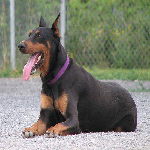

In [24]:
Image.open(PATH + fn).resize((150, 150))

In [25]:
trn_tfms, val_tfms = tfms_from_model(arch, sz)
ds = FilesIndexArrayDataset([fn], np.array([0]), val_tfms, PATH)
dl = DataLoader(ds)
preds = learn.predict_dl(dl)
np.argmax(preds)

38

In [27]:
learn.data.classes[38]

'doberman'

In [32]:
im = val_tfms(open_image(PATH + fn))
preds = learn.predict_array(im[None])
np.argmax(preds)

38